Загрузка PySpark

In [5]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [6]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [7]:
!wget -q https://mirror.linux-ia64.org/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

In [9]:
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [10]:
!pip install -q findspark

In [11]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [12]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [75]:
df5=spark.read.csv('iris.csv', inferSchema=True, header=True)

In [76]:
df5.take(5)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.7, sepal.width=3.2, petal.length=1.3, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.1, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.6, petal.length=1.4, petal.width=0.2, variety='Setosa')]

In [77]:
df5=df5.withColumnRenamed('sepal.length','sepal_length')

In [78]:
df5=df5.withColumnRenamed('sepal.width','sepal_width')

In [79]:
df5=df5.withColumnRenamed('petal.length','petal_length')

In [80]:
df5=df5.withColumnRenamed('petal.width','petal_width')

In [81]:
df5.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

In [82]:
df_g=df5.groupBy('variety')

In [83]:
df_m=df_g.max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [84]:
df_m=df_g.min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [85]:
df_m=df_g.avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [86]:
import pandas as pd

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
df6=df5.select(['petal_length', 'petal_width', 'variety'])
df6.show()

+------------+-----------+-------+
|petal_length|petal_width|variety|
+------------+-----------+-------+
|         1.4|        0.2| Setosa|
|         1.4|        0.2| Setosa|
|         1.3|        0.2| Setosa|
|         1.5|        0.2| Setosa|
|         1.4|        0.2| Setosa|
|         1.7|        0.4| Setosa|
|         1.4|        0.3| Setosa|
|         1.5|        0.2| Setosa|
|         1.4|        0.2| Setosa|
|         1.5|        0.1| Setosa|
|         1.5|        0.2| Setosa|
|         1.6|        0.2| Setosa|
|         1.4|        0.1| Setosa|
|         1.1|        0.1| Setosa|
|         1.2|        0.2| Setosa|
|         1.5|        0.4| Setosa|
|         1.3|        0.4| Setosa|
|         1.4|        0.3| Setosa|
|         1.7|        0.3| Setosa|
|         1.5|        0.3| Setosa|
+------------+-----------+-------+
only showing top 20 rows



In [89]:
df7=df6.toPandas()
df7.head(100)

,petal_length,petal_width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa
...,...,...,...
95,4.2,1.2,Versicolor
96,4.2,1.3,Versicolor
97,4.3,1.3,Versicolor
98,3.0,1.1,Versicolor


In [101]:
colors = {'Virginica':'r', 'Setosa':'g', 'Versicolor':'b'}

Text(0, 0.5, 'petal_width')

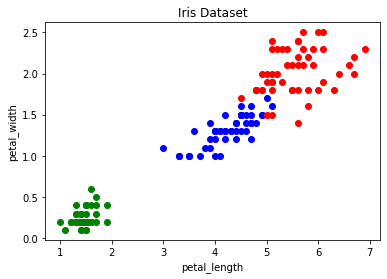

In [109]:
fig, ax = plt.subplots()
for i in range(len(df7['petal_length'])):
    ax.scatter(df7['petal_length'][i], df7['petal_width'][i],color=colors[df7['variety'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')

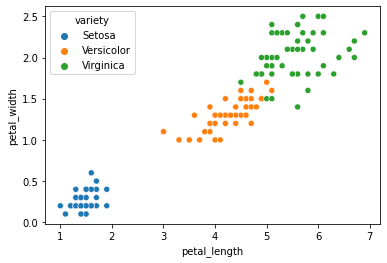

In [108]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue ='variety', data=df7)

In [ ]:
# Правило: если petal_width<0,5 and petal_length<2, то тип цветка = Setosa, если нет то = Unknown

In [113]:
from pyspark.sql.functions import when

In [ ]:
df5.show()

In [ ]:
df_filter = df.where((df['quantity'] > 185000) & (df['country'] != 'United States'))

In [126]:
df6 = df5.withColumn('New_colomn', when(df5.petal_length < 2, 'Setosa').when(df5.petal_width < 0.5, 'Setosa').otherwise('Unknown'))
df6.show()

+------------+-----------+------------+-----------+-------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|New_colomn|
+------------+-----------+------------+-----------+-------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|    Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|    Setosa|
|     

In [131]:
df6.where((df6['New_colomn'] == 'Setosa') & (df6['variety'] == 'Setosa')).count()


50

In [132]:
df6.where((df6['New_colomn'] == 'Setosa') & (df6['variety'] != 'Setosa')).count()

0

In [ ]:
# точное предсказание, ошибка "0"